<a href="https://colab.research.google.com/github/jonnes-nascimento/machine_learning/blob/master/Introdu%C3%A7%C3%A3o_aos_algoritmos_de_linguagem_neural_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

nltk.download("all")

!pip install wordcloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

# Importando a base de dados do IMDB

In [2]:
from google.colab import drive
import pandas as pd

# monta a pasta do Google Drive que contém o arquivo com os dados de análise
drive.mount("/content/drive")

resenha = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb-reviews-pt-br.csv")

resenha

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


# Separando os dados da resenha para treino e teste

In [0]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state = 42)

# Treinamento e classificação

In [4]:
# analisando dois casos

print("Negativo\n")
print(resenha.text_pt[189])
print("\n")

print("Positivo\n")
print(resenha.text_pt[49002])
print("\n")

# É importante termos os dados balanceados. No nosso caso, por exemplo, temos que nos certificar de termos dados positivos e negativos balanceados
print(resenha.sentiment.value_counts())

Negativo

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


Positivo

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos d

In [5]:
# padronizando as classes dos dados

classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])
resenha["classificacao"] = classificacao

resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti a um filme ótimo", "Assisti a um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)

# exibe o vocabulario criado
print(vetorizar.get_feature_names())

# gerando um dataframe da matriz esparsa criada pelo CountVectorizer
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(data=bag_of_words, columns=vetorizar.get_feature_names())

matriz_esparsa

['Assisti', 'filme', 'ruim', 'um', 'ótimo']


,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [7]:
# limitando a quantidade de features no bag of words (50 palavras)
vetorizar = CountVectorizer(lowercase=False, max_features=50)

bag_of_words = vetorizar.fit_transform(resenha.text_pt)

print(bag_of_words.shape)

(49459, 50)


In [8]:
from sklearn.linear_model import LogisticRegression

# separando (segregando) os dados
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              resenha.classificacao, 
                                                              random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)

acuracia = regressao_logistica.score(teste, classe_teste)

print(acuracia)

0.6583097452486858


In [9]:
# criando uma funcao para se obter a acuracia dos dados de teste e de treino

def classificar_texto(texto, coluna_texto, coluna_classificacao):

  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              texto[coluna_classificacao], 
                                                              random_state = 42)
  
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)

  return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))


0.6583097452486858


# Criando nuvens de palavras (word cloud)

In [0]:
from wordcloud import WordCloud

todas_palavras = " ".join([texto for texto in resenha.text_pt])

len(todas_palavras)

nuvem_palavras = WordCloud(width=800, 
                           height=500, 
                           max_font_size=110, 
                           collocations=False).generate(todas_palavras)

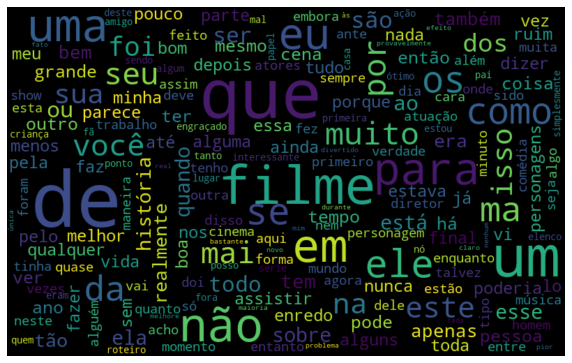

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.axis("off")
plt.imshow(nuvem_palavras, interpolation="bilinear")

# Separando as nuvens de palavras positivas e negativas

In [0]:
def nuvem_palavras_neg(texto, coluna_texto):
  
  texto_negativo = texto.query("sentiment == 'neg'")

  todas_palavras = " ".join([texto for texto in texto_negativo[coluna_texto]])

  len(todas_palavras)

  nuvem_palavras = WordCloud(width=800, 
                            height=500, 
                            max_font_size=110, 
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.axis("off")
  plt.imshow(nuvem_palavras, interpolation="bilinear")

def nuvem_palavras_pos(texto, coluna_texto):
  
  texto_positivo = texto.query("sentiment == 'pos'")

  todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])

  len(todas_palavras)

  nuvem_palavras = WordCloud(width=800, 
                            height=500, 
                            max_font_size=110, 
                            collocations=False).generate(todas_palavras)
                          
  plt.figure(figsize=(10, 7))
  plt.axis("off")
  plt.imshow(nuvem_palavras, interpolation="bilinear")

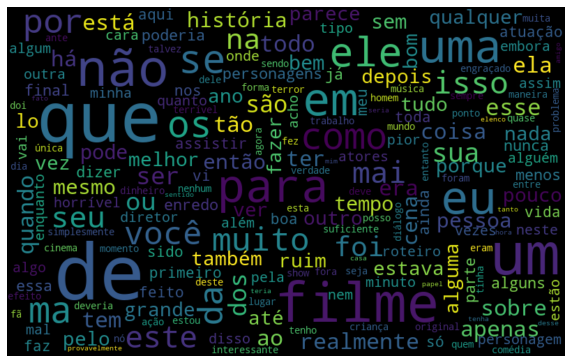

In [13]:
nuvem_palavras_neg(resenha, "text_pt")

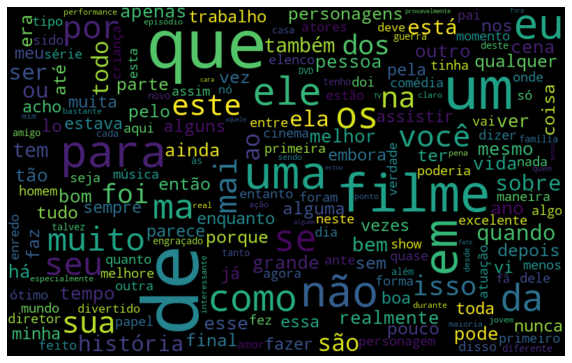

In [14]:
nuvem_palavras_pos(resenha, "text_pt")

# Analisando as palavras com a biblioteca NLTK

In [15]:
frase = ["um filme bom", "um filme ruim"]

frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [16]:
# Utilizando tokens para separar as palavras

from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [0]:
# aplicando o token às resenhas

token_frase = token_espaco.tokenize(todas_palavras)

# o FreqDist gera um mapa com as palavras e suas quantidades
frequencia = nltk.FreqDist(token_frase)

In [0]:
# criamos um dataframe para facilitar o trabalho com os dados gerados na tokenização
df_frequencia = pd.DataFrame({"palavra" : list(frequencia.keys()),
                              "frequencia" : list(frequencia.values())})

# ordena o dataframe pela frequencia e exibe os 10 primeiros items
palavras = df_frequencia.nlargest(columns='frequencia', n=10)

# Analisando as palavras através de um gráfico de barras

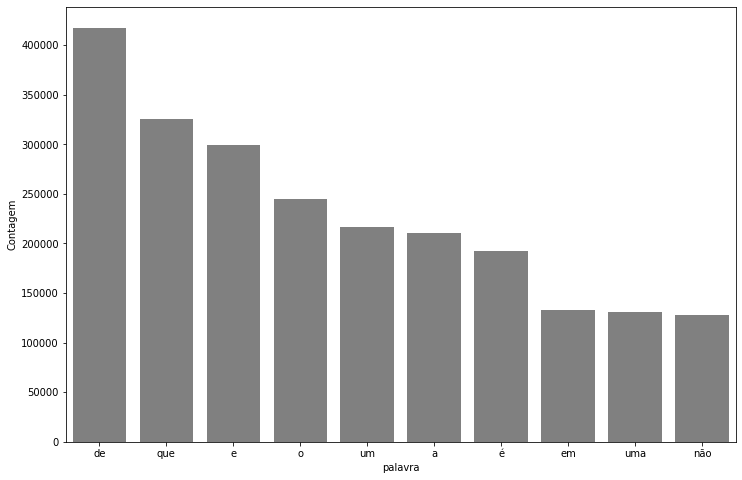

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=palavras, x="palavra", y="frequencia", color="gray")
ax.set(ylabel="Contagem")

plt.show()

In [0]:
def barras(texto, coluna_texto, quantidade):
  todas_palavras = " ".join([texto for texto in texto[coluna_texto]])

  token_frase = token_espaco.tokenize(todas_palavras)

  frequencia = nltk.FreqDist(token_frase)

  df_frequencia = pd.DataFrame({"palavra" : list(frequencia.keys()),
                              "frequencia" : list(frequencia.values())})

  palavras = df_frequencia.nlargest(columns='frequencia', n=quantidade)

  plt.figure(figsize=(12, 8))

  ax = sns.barplot(data=palavras, x="palavra", y="frequencia", color="gray")
  ax.set(ylabel="Contagem")

  plt.show()

In [28]:
# removendo as palavras que não agregam à análise do word cloud
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
# este passo deve ser feito logo no início da análise de dados (na fase de pré-processamento)
# vou fazer aqui somente para continuar com o raciocínio que venha seguindo durante o curso

frase_processada = list()

for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)

  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)

  frase_processada.append(" ".join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [33]:
print(classificar_texto(resenha, "tratamento_1", "classificacao"))

0.6607359482410028


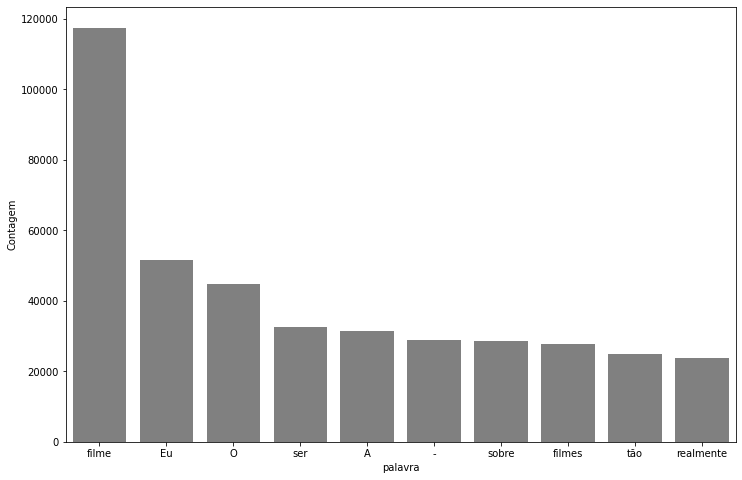

In [36]:
 barras(resenha, "tratamento_1", 10)